In [45]:
import librosa
audio_file = 'SERDataset/Train/Happy/SF1_F4_H04.wav'
signal , sampling_rate = librosa.load(audio_file, sr=16000)
print(type(signal), type(sampling_rate))
len(signal), sampling_rate

<class 'numpy.ndarray'> <class 'int'>


(48057, 16000)

In [46]:
length = len(signal)/sampling_rate
print(length, "sec")

3.0035625 sec


In [47]:
from IPython.display import Audio
Audio(audio_file)

Text(0, 0.5, 'Amplitude')

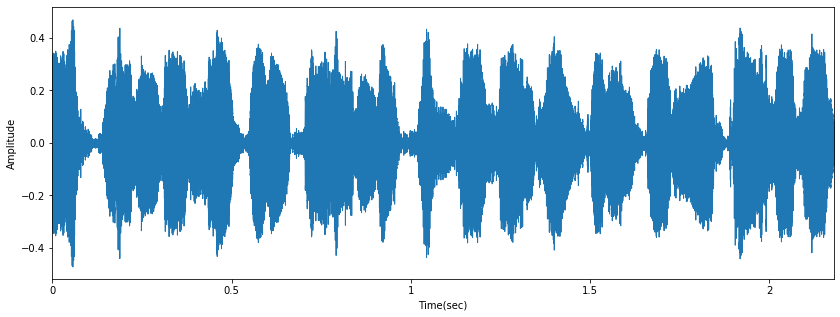

In [48]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(signal)

plt.xlabel("Time(sec)")
plt.ylabel("Amplitude")

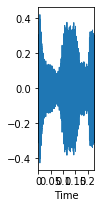

In [49]:
sub = signal[23000:28000]
plt.figure(figsize=(1, 3))
librosa.display.waveplot(sub)

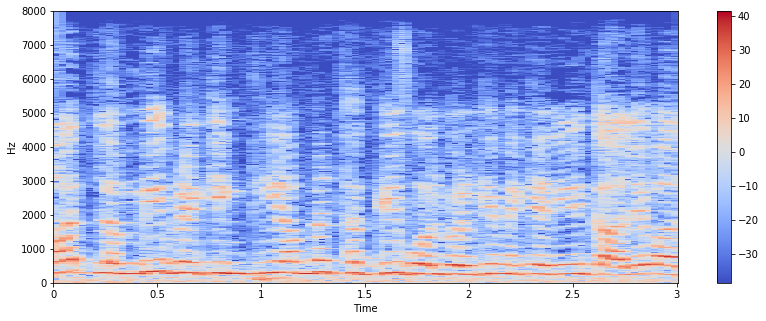

In [50]:
S = librosa.stft(signal)
Sdb = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Sdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

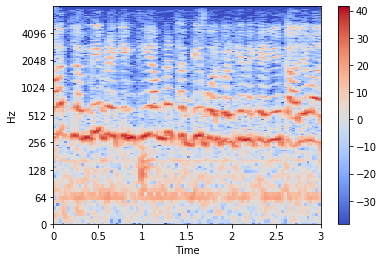

In [38]:
librosa.display.specshow(Sdb, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()

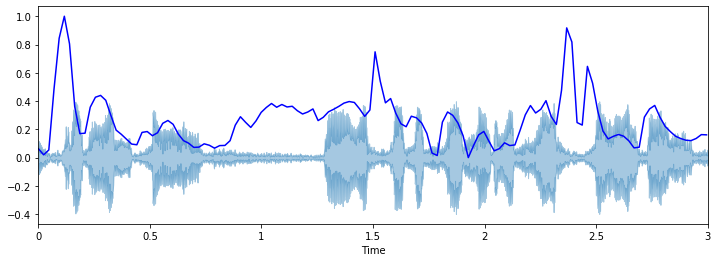

In [17]:
import sklearn
audio_file = 'SERDataset/Train/Angry/SM1_F10_A010.wav'
signal , sr = librosa.load(audio_file)
spectral_centroids = librosa.feature.spectral_centroid(signal, sr=sr)[0]
spectral_centroids.shape
(775,)

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(signal, axis=0):
    return sklearn.preprocessing.minmax_scale(signal, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

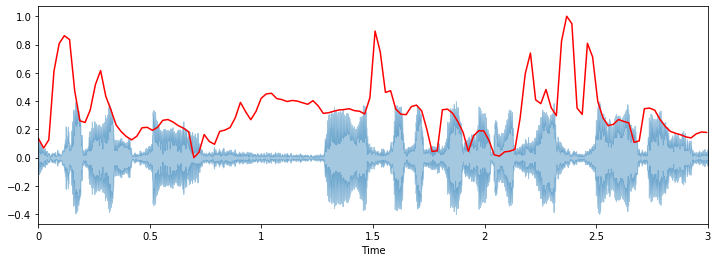

In [18]:
spectral_rolloff = librosa.feature.spectral_rolloff(signal+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

<Figure size 1008x360 with 0 Axes>

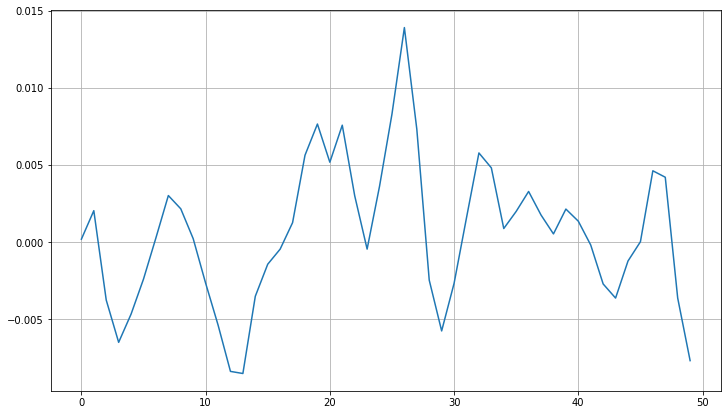

In [19]:
#Plot the signal:
plt.figure(figsize=(14, 5))
#librosa.display.waveplot(signal, sr=sr)
# Zooming in
s0=25000
s1=25050
plt.figure(figsize=(12, 7))
plt.plot(signal[s0:s1])
plt.grid()

In [20]:
zero_crossings = librosa.zero_crossings(signal[s0:s1], pad=False)
print(sum(zero_crossings))

11


(20, 130)


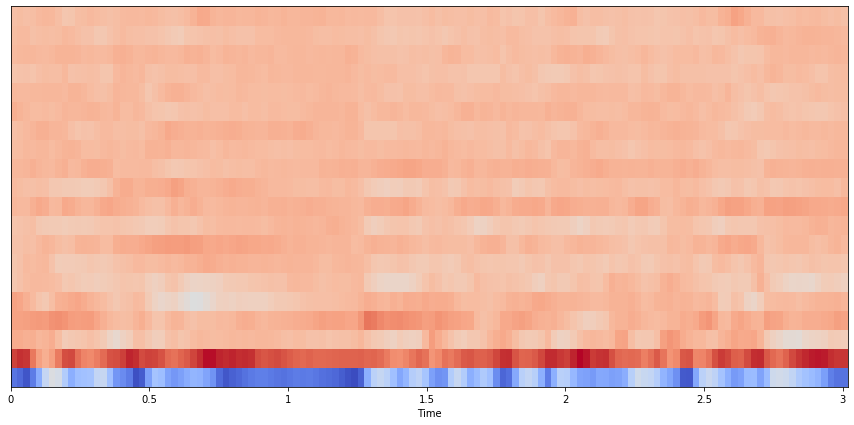

In [21]:
mfccs = librosa.feature.mfcc(signal, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

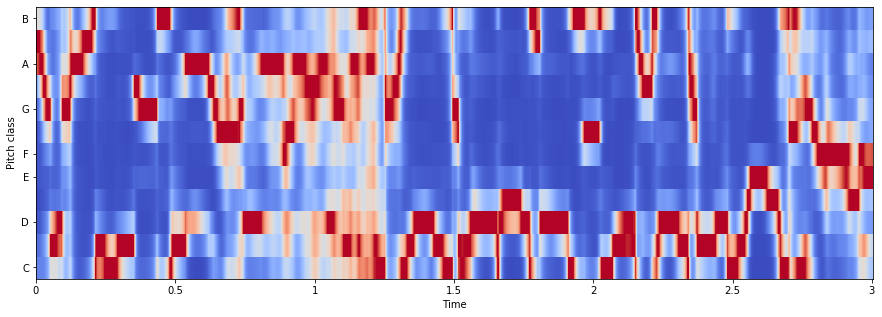

In [22]:
chromagram = librosa.feature.chroma_stft(signal, sr=sr, hop_length=12)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=12, cmap='coolwarm')

In [29]:
from os import environ, path

from pocketsphinx.pocketsphinx import *
from sphinxbase.sphinxbase import *

In [30]:
MODELDIR = "pocketsphinx/model"

# Create a decoder with certain model
config = Decoder.default_config()
config.set_string('-hmm', path.join(MODELDIR, 'en-us/en-us'))
config.set_string('-allphone', path.join(MODELDIR, 'en-us/en-us-phone.lm.dmp'))
config.set_float('-lw', 2.0)
config.set_float('-beam', 1e-10)
config.set_float('-pbeam', 1e-10)

# Decode streaming data.
decoder = Decoder(config)
decoder.start_utt()
stream = open('045FCN008.wav', 'rb')
while True:
  buf = stream.read(1024)
  if buf:
    decoder.process_raw(buf, False, False)
  else:
    break
decoder.end_utt()
print ('Best hypothesis segments: ', [seg.word for seg in decoder.seg()])

Best hypothesis segments:  ['SIL', 'IH', 'S', 'P', 'OY', 'S', 'AE', 'K', 'UH', 'SH', 'EY', 'EH', 'D', 'K', 'EH', 'L', 'K', 'SIL']
